# Merge and Splitのmockup

* Measure Xが未実装．現状InitPlus, Memoryのみ
* detector, prity, xflowも未実装
* temporal pipeが一部動かない．

In [1]:
import pathlib
import sys


from lspattern.blocks.pipes.memory import MemoryPipeSkeleton
from lspattern.blocks.cubes.initialize import InitPlusCubeSkeleton
from lspattern.blocks.cubes.memory import MemoryCubeSkeleton
from lspattern.canvas import CompiledRHGCanvas, RHGCanvas, RHGCanvasSkeleton
from lspattern.mytype import PatchCoordGlobal3D

# %%
d = 3
r = 3


canvass = RHGCanvasSkeleton("Memory X")

edgespec = {"LEFT": "X", "RIGHT": "X", "TOP": "Z", "BOTTOM": "Z"}
edgespec1 = {"LEFT": "X", "RIGHT": "O", "TOP": "Z", "BOTTOM": "Z"}
edgespec2 = {"LEFT": "O", "RIGHT": "X", "TOP": "Z", "BOTTOM": "Z"}
edgespec_trimmed = {"LEFT": "O", "RIGHT": "O", "TOP": "Z", "BOTTOM": "Z"}
blocks = [
    (
        PatchCoordGlobal3D((0, 0, 0)),
        InitPlusCubeSkeleton(d=3, edgespec=edgespec),
    ),
    (
        PatchCoordGlobal3D((1, 0, 0)),
        InitPlusCubeSkeleton(d=3, edgespec=edgespec),
    ),
    (
        PatchCoordGlobal3D((0, 0, 1)),
        MemoryCubeSkeleton(d=3, edgespec=edgespec1),
    ),
    (
        PatchCoordGlobal3D((1, 0, 1)),
        MemoryCubeSkeleton(d=3, edgespec=edgespec2),
    ),
    (
        PatchCoordGlobal3D((0, 0, 2)),
        MemoryCubeSkeleton(d=3, edgespec=edgespec),
    ),
    (
        PatchCoordGlobal3D((1, 0, 2)),
        MemoryCubeSkeleton(d=3, edgespec=edgespec),
    ),
]
pipes = [
    (
        PatchCoordGlobal3D((0, 0, 1)),
        PatchCoordGlobal3D((1, 0, 1)),
        MemoryPipeSkeleton(d=3, edgespec=edgespec_trimmed),
    ),
    (
        PatchCoordGlobal3D((0, 0, 0)),
        PatchCoordGlobal3D((0, 0, 1)),
        MemoryPipeSkeleton(d=3, edgespec=edgespec_trimmed),
    ),
    # (
    #     PatchCoordGlobal3D((0, 0, 1)),
    #     PatchCoordGlobal3D((0, 0, 2)),
    #     MemoryPipeSkeleton(d=3, edgespec=edgespec_trimmed),
    # ),
    # (
    #     PatchCoordGlobal3D((1, 0, 0)),
    #     PatchCoordGlobal3D((1, 0, 1)),
    #     MemoryPipeSkeleton(d=3, edgespec=edgespec_trimmed),
    # ),
    # (
    #     PatchCoordGlobal3D((1, 0, 1)),
    #     PatchCoordGlobal3D((1, 0, 2)),
    #     MemoryPipeSkeleton(d=3, edgespec=edgespec_trimmed),
    # ),
]

for block in blocks:
    # RHGCanvasSkeleton は skeleton を受け取り、to_canvas() で block 化します
    canvass.add_cube(*block)
for pipe in pipes:
    canvass.add_pipe(*pipe)

canvas = canvass.to_canvas()
# temporal_layer = canvas.to_temporal_layers()

compiled_canvas: CompiledRHGCanvas = canvas.compile()
nnodes = (
    len(getattr(compiled_canvas.global_graph, "physical_nodes", []) or [])
    if compiled_canvas.global_graph
    else 0
)
nedges = (
    len(getattr(compiled_canvas.global_graph, "physical_edges", []) or [])
    if compiled_canvas.global_graph
    else 0
)
print(
    {
        "layers": len(compiled_canvas.layers),
        "nodes": nnodes,
        "edges": nedges,
        "coord_map": len(compiled_canvas.coord2node),
    }
)

graph1 must be in canonical form.
graph2 must be in canonical form.
graph1 must be in canonical form.
graph2 must be in canonical form.
graph1 must be in canonical form.
graph2 must be in canonical form.
graph1 must be in canonical form.
graph2 must be in canonical form.
cgraph before remap
{(0, 0, 0): InitPlus(d=3, edge_spec={'LEFT': 'X', 'RIGHT': 'X', 'TOP': 'Z', 'BOTTOM': 'Z'}, source=(0, 0, 0), sink=None, template=RotatedPlanarCubeTemplate(id_=1, data_coords=[(0, 0), (2, 0), (4, 0), (0, 2), (2, 2), (4, 2), (0, 4), (2, 4), (4, 4)], coord2qubitindex={}, coord2id={}, x_coords=[(-1, 1), (3, 1), (1, 3), (5, 3)], z_coords=[(3, -1), (1, 1), (3, 3), (1, 5)], d=3, edgespec={'LEFT': 'X', 'RIGHT': 'X', 'TOP': 'Z', 'BOTTOM': 'Z'}, data_indices=[], trimmed=False), in_ports=set(), out_ports={0, 1, 2, 3, 4, 5, 6, 7, 8}, cout_ports=[], schedule=ScheduleAccumulator(schedule={}), flow=FlowAccumulator(xflow={}, zflow={}), parity=ParityAccumulator(x_checks=[], z_checks=[]), local_graph=<graphix_zx.gra

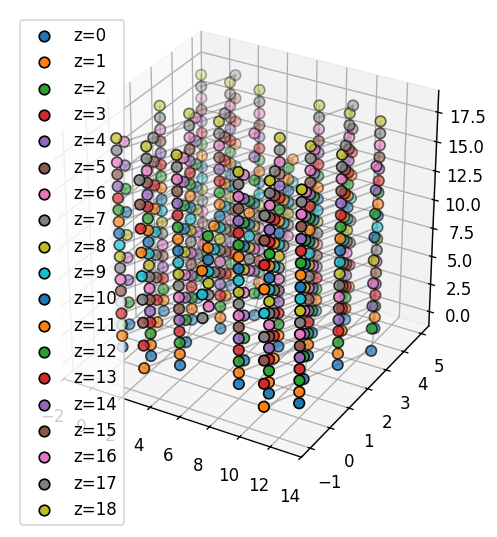

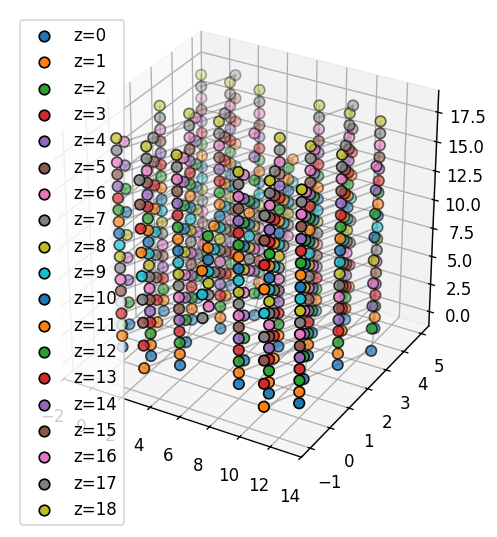

In [2]:
from lspattern.visualizers import visualize_compiled_canvas
fig = visualize_compiled_canvas(compiled_canvas, show=True, show_edges=True)
fig

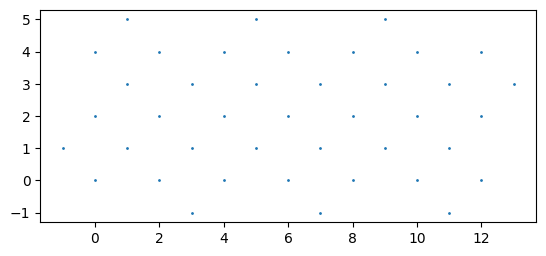

In [3]:
import matplotlib.pyplot as plt

vals = compiled_canvas.coord2node
vals2d = set((x, y) for (x, y, z) in vals.keys())
plt.scatter(*[list(t) for t in zip(*vals2d)], s=1)
plt.gca().set_aspect("equal", "box")
plt.show()

In [4]:
from lspattern.visualizers import visualize_compiled_canvas_plotly

fig3d = visualize_compiled_canvas_plotly(compiled_canvas, show_edges=True)
fig3d.show()